In [184]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict

In [185]:
Q = ['q0', 'q1', 'q2']
A = ['a1', 'a2', 'a3'] #'a3'
B = ['0', '1']
phi = {
    ('q0', A[0]): 'q0',
    ('q0', A[1]): 'q1',
    ('q0', A[2]): 'q1',

    ('q1', A[0]): 'q1',
    ('q1', A[1]): 'q2',
    ('q1', A[2]): 'q2',

    ('q2', A[0]): 'q2',  
    ('q2', A[1]): 'q2', 
    ('q2', A[2]): 'q2', 


}

psi = {
    ('q0', A[0]): B[1],
    ('q0', A[1]): B[1],
    ('q0', A[2]): B[1],

    ('q1', A[0]): B[0],
    ('q1', A[1]): B[1],
    ('q1', A[2]): B[1],

    ('q2', A[0]): B[0],
    ('q2', A[1]): B[0],
    ('q2', A[2]): B[0],

}
q_start = 'q0'

In [186]:
schema_encoding = {
    # 'a1': '1',
    # 'a2': '01',
    # 'a3': '100',
    # 'a4': '0100',
    # 'a5': '0000',

    #A[0]: '01',
    #A[1]: '0101',
    #A[2]: '010101',

    'a1': '01',
    'a2': '0101',
    'a3': '010101',
}


In [187]:
def build_intersect_source(schema_encoding, A, B, Q, phi, psi, q_start): 
    edges = defaultdict(list) 
    empty_empty_vertex = (('', ''), (q_start, q_start), ('', ''))

    start_vertex = empty_empty_vertex
    final_vertexes = []

    vertexes = [empty_empty_vertex]
    seen = set(empty_empty_vertex)

    for v in vertexes:
        len_v0 = len(v[0][0])
        len_v1 = len(v[0][1])
        for a1, a1_encoding in schema_encoding.items():
            a1_encoding_len = len(a1_encoding)

            if len_v0 > len_v1 and a1_encoding_len >= len_v0:
                new_v0_suffix = ''
                new_v1_suffix = a1_encoding[len_v0:]
                new_v_suffixes = (new_v0_suffix, new_v1_suffix)
                
                new_v0_state = v[1][0]
                new_v1_state = phi[(v[1][1], a1)]
                new_v_states = (new_v0_state, new_v1_state)

                new_v0_exit_value = v[2][0]
                new_v1_exit_value = psi[(v[1][1], a1)]
                new_v_exit_values = (new_v0_exit_value, new_v1_exit_value)
                
                new_v = (new_v_suffixes, new_v_states, new_v_exit_values)

                if new_v not in seen:
                    seen.add(new_v)
                    vertexes.append(new_v)
                    if new_v_suffixes == ('', '') and new_v[2][0] == B[1] and new_v[2][1] == B[1]:
                        final_vertexes.append(new_v)

                new_edge_weight = ('', a1)
                edges[v].append((new_v, new_edge_weight))


            elif len_v0 <= len_v1 and a1_encoding_len >= len_v1:
                new_v1_suffix = ''
                new_v0_suffix = a1_encoding[len_v1:]
                new_v_suffixes = (new_v0_suffix, new_v1_suffix)

                new_v1_state = v[1][1]
                new_v0_state = phi[(v[1][0], a1)]
                new_v_states = (new_v0_state, new_v1_state)

                new_v1_exit_value = v[2][1]
                new_v0_exit_value = psi[(v[1][0], a1)]
                new_v_exit_values = (new_v0_exit_value, new_v1_exit_value)

                new_v = (new_v_suffixes, new_v_states, new_v_exit_values)

                if new_v not in seen:
                    seen.add(new_v)
                    vertexes.append(new_v)
                    if new_v_suffixes == ('', '') and new_v[2][0] == B[1] and new_v[2][1] == B[1]:
                        final_vertexes.append(new_v) 

                new_edge_weight = (a1, '')
                edges[v].append((new_v, new_edge_weight))


    return {'vertexes':vertexes, 
            'edges': edges, 
            'start_vertex': start_vertex,
            'final_vertexes': final_vertexes} 


In [188]:
def rec_get_edge_path_to_final(cur_vertex, final_vertexes, edges, seen=None, path=None):
    if seen is None:
        seen = set()
    if path is None:
        path = []

    seen = set(seen)
    seen.add(cur_vertex)

    if cur_vertex in final_vertexes and len(path) > 2:
        return path

    for next_vertex, edge_weight in edges.get(cur_vertex, []):
        if next_vertex not in seen:
            new_path = path + [(cur_vertex, next_vertex, edge_weight)]  
            result = rec_get_edge_path_to_final(next_vertex, final_vertexes, edges, seen, new_path)
            if result:
                return result

    return None

In [189]:
intersected_source = build_intersect_source(schema_encoding, A, B, Q, phi, psi, q_start)

# for v in intersected_source['vertexes']:
#     print('suffixes:', v[0])
#     print('states:', v[1])
#     print('exit_values:', v[2])
# print('----------------------------------------------------------------------------------')
# print('start_vertex:', intersected_source['start_vertex'])
# print('----------------------------------------------------------------------------------')
# for f in intersected_source['final_vertexes']:
#     print('final_vertex:', f)
# print('----------------------------------------------------------------------------------')
# for v1, (v2, weigth) in intersected_source['edges'].items():
#     print(v1, '->', v2, 'weight:', weigth)



#print(len(intersected_source['vertexes']))



node_counts = Counter(intersected_source['vertexes'])
duplicate_nodes = [node for node, count in node_counts.items() if count > 1]

if duplicate_nodes:
    for node in duplicate_nodes:
        print(node)
else:
    print("no diplicates")



no diplicates


In [190]:
path = rec_get_edge_path_to_final(intersected_source['start_vertex'], 
                      intersected_source['final_vertexes'], 
                      intersected_source['edges'])


for v1, v2, weight in path:
    print(v1, '->', v2, 'weight:', weight)

(('', ''), ('q0', 'q0'), ('', '')) -> (('01', ''), ('q0', 'q0'), ('1', '')) weight: ('a1', '')
(('01', ''), ('q0', 'q0'), ('1', '')) -> (('', ''), ('q0', 'q0'), ('1', '1')) weight: ('', 'a1')
(('', ''), ('q0', 'q0'), ('1', '1')) -> (('01', ''), ('q0', 'q0'), ('1', '1')) weight: ('a1', '')
(('01', ''), ('q0', 'q0'), ('1', '1')) -> (('', '01'), ('q0', 'q1'), ('1', '1')) weight: ('', 'a2')
(('', '01'), ('q0', 'q1'), ('1', '1')) -> (('', ''), ('q0', 'q1'), ('1', '1')) weight: ('a1', '')


C:\Users\Maxim\AppData\Local\Temp\ipykernel_5588\4123273012.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


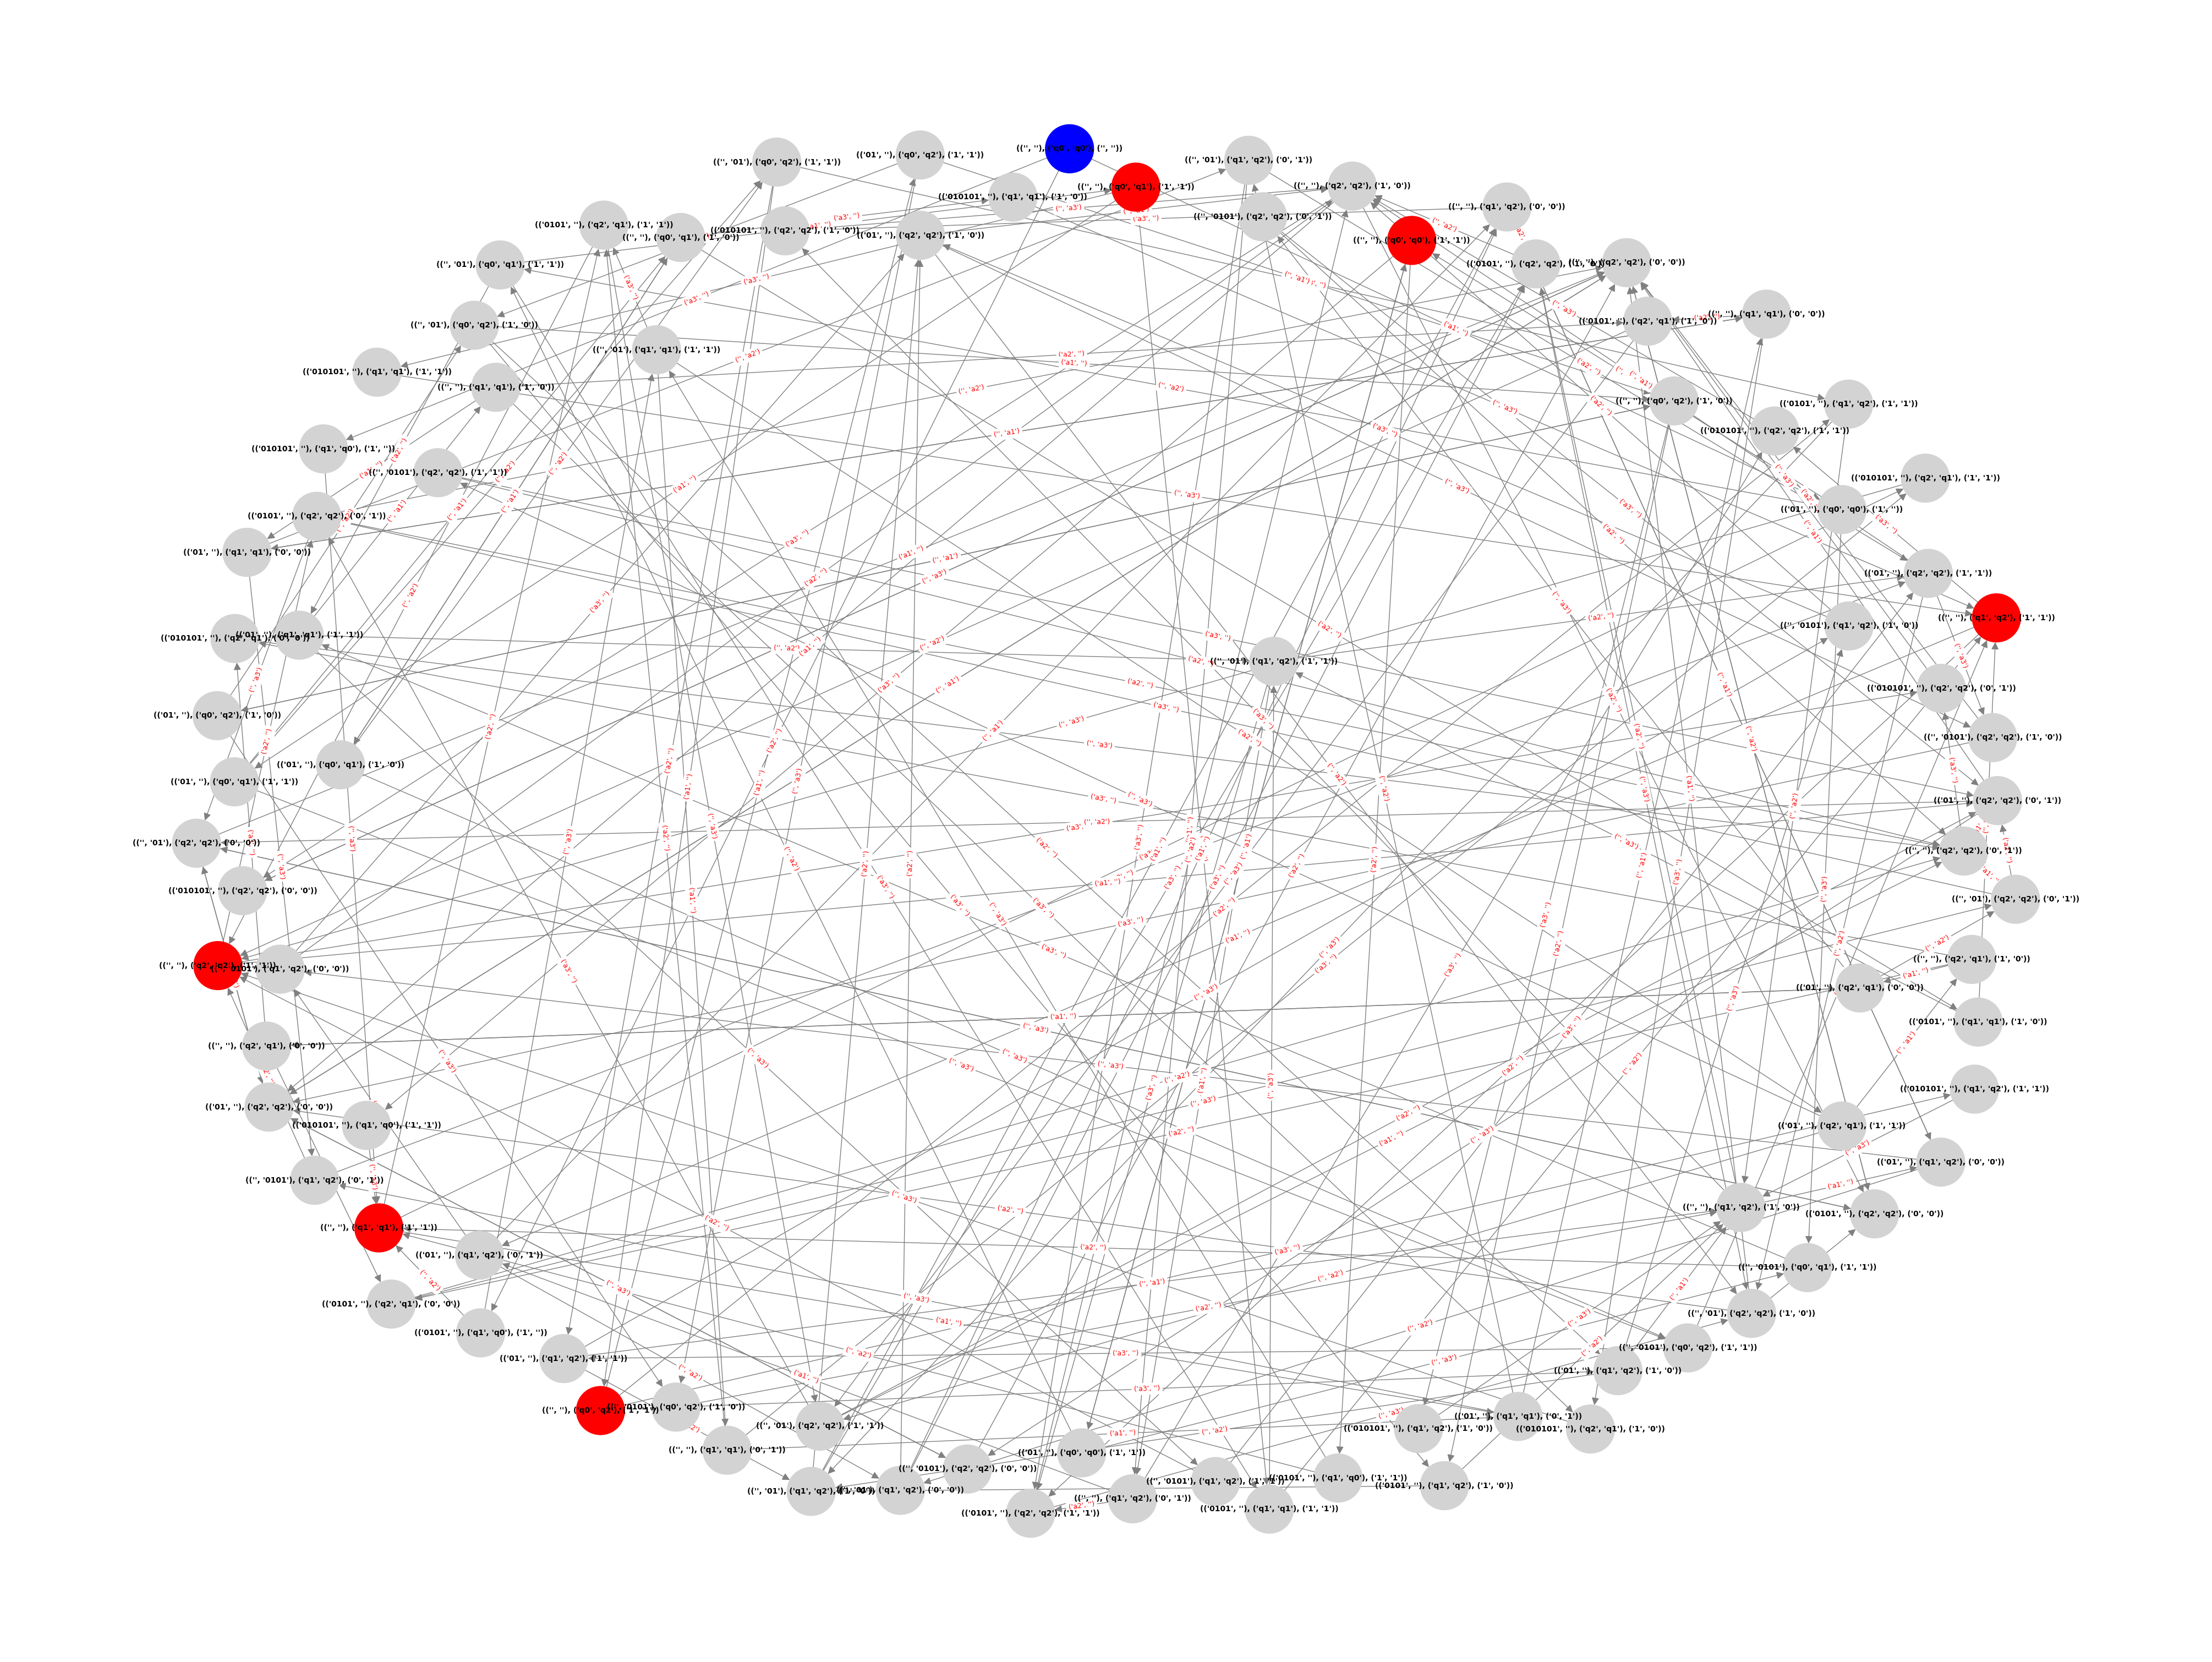

In [191]:
G = nx.DiGraph()
nodes = intersected_source['vertexes']
edges = intersected_source['edges'] 

node_labels = {}
node_colors = []

for node in nodes:
    G.add_node(node)
    node_labels[node] = f"{node}"

    if node in intersected_source['final_vertexes']:
        node_colors.append('red')
    elif node[2] == ('', '') and node[0] == ('', ''):
        node_colors.append('blue')
    else:
        node_colors.append('lightgray')

edge_labels = {}

for from_node, value in edges.items():
    edge_list = value if isinstance(value, list) else [value]

    for to_node, label in edge_list:
        G.add_edge(from_node, to_node, label=label)
        edge_labels[(from_node, to_node)] = f"{label}"

pos = nx.spring_layout(G, seed=42, k=2.5)

plt.figure(figsize=(40, 30))

nx.draw(
    G, pos,
    with_labels=True,
    labels=node_labels,
    node_size=4000,
    node_color=node_colors,
    font_size=10,
    font_weight='bold',
    edge_color='gray',
    arrowsize=20
)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='red',
    font_size=9
)

plt.tight_layout()
plt.show()